In [1]:
from collections import defaultdict
import os
import numpy as np
import re

import matplotlib.pyplot as plt
np.random.seed(42)

# 预处理源数据
## rocstory_data
源数据是从助教处拿来的数据，每行格式为 ```title <EOT> storyline <EOL> </s> s1 ... </s> s5```

这里将其中的故事线去除，并调整```</s>```的位置，生成的格式为 ```title <EOT> s1 </s> ... s5 </s>```

In [3]:
data_dir = 'rocstory_data'
out_dir = 'rocstory_data/raw_data/'
filenames = ['train.txt', 'valid.txt', 'test.txt']
for filename in filenames:
    with open(os.path.join(data_dir, filename), 'rt') as f:
        lines = f.readlines()
    new_lines=[]
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip() + ' </s>'
        story = line[line.find('<EOL>')+11:].strip() + ' </s>'
        new_lines.append(title+' '+story)
    outfile = os.path.join('data', out_dir, filename)
    if not os.path.exists(os.path.dirname(outfile)):
        os.makedirs(os.path.dirname(outfile))
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line+'\n')
            except:
                print(i, line)

## rocstoryline_data
包含助教提供的storyline的数据，格式修正为```title <EOT> l1 ... l5 <EOL> s1 </s> ... s5 </s>```

In [55]:
data_dir = 'rocstory_data'
out_dir = 'rocstoryline_data/raw_data/'
filenames = ['train.txt', 'valid.txt', 'test.txt']
for filename in filenames:
    with open(os.path.join(data_dir, filename), 'rt') as f:
        lines = f.readlines()
    new_lines=[]
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip() + ' </s>'
        storyline = line[line.find('<EOT>')+6:line.find('<EOL>')+5] + ' </s>'
        story = line[line.find('<EOL>')+11:].strip() + ' </s>'
        new_lines.append(title+' '+storyline+' '+story)
    outfile = os.path.join('data', out_dir, filename)
    # make the parent directory if needed
    if not os.path.exists(os.path.dirname(outfile)):
        os.makedirs(os.path.dirname(outfile))
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line+'\n')
            except:
                print(i, line)

## new roc data

In [4]:
data_dir = 'new_roc_data/title_storyline_story/'
out_dir = 'new_roc_data/raw_data/'
filenames = ['train.txt', 'valid.txt', 'test.txt']
for filename in filenames:
    with open(os.path.join(data_dir, filename), 'rt') as f:
        lines = f.readlines()
    new_lines=[]
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip() + ' </s>'
        storyline = ' '.join(line[line.find('<EOT>')+8:line.find('<EOL>')+5].split(' # '))\
            + ' </s>'
        story = line[line.find('<EOL>')+11:-].strip() + ' </s>'
        new_lines.append(title+' '+storyline+' '+story)
    outfile = os.path.join('data', out_dir, filename)
    # make the parent directory if needed
    if not os.path.exists(os.path.dirname(outfile)):
        os.makedirs(os.path.dirname(outfile))
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line+'\n')
            except:
                print(i, line)

## new_roc_data_v2

In [11]:
data_dir = 'new_roc_data_v2/title_storyline_story/'
out_dir = 'new_roc_data_v2/raw_data/'
filenames = ['train.txt', 'valid.txt', 'test.txt']
for filename in filenames:
    with open(os.path.join(data_dir, filename), 'rt') as f:
        lines = f.readlines()
    new_lines=[]
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip() + ' </s>'
        storyline = ' '.join(line[line.find('<EOT>')+8:line.find('<EOL>')+5].split(' # '))\
            + ' </s>'
        story = line[line.find('<EOL>')+11:-6].strip() + ' </s>'
        new_lines.append(title+' '+storyline+' '+story)
    outfile = os.path.join('data', out_dir, filename)
    # make the parent directory if needed
    if not os.path.exists(os.path.dirname(outfile)):
        os.makedirs(os.path.dirname(outfile))
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line+'\n')
            except:
                print(i, line)

## new_roc_data_v3

In [17]:
data_dir = 'new_roc_data_v3/title_storyline_story/'
out_dir = 'new_roc_data_v3/raw_data/'
filenames = ['train.txt', 'valid.txt', 'test.txt']
for filename in filenames:
    with open(os.path.join(data_dir, filename), 'rt') as f:
        lines = f.readlines()
    new_lines=[]
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip() + ' </s>'
        storyline = ' '.join(line[line.find('<EOT>')+11:line.find('<EOL>')+5].split(' </l> '))\
            + ' </s>'
        story = line[line.find('<EOL>')+11:-7].strip() + ' </s>'
        new_lines.append(title+' '+storyline+' '+story)
    outfile = os.path.join('data', out_dir, filename)
    # make the parent directory if needed
    if not os.path.exists(os.path.dirname(outfile)):
        os.makedirs(os.path.dirname(outfile))
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line+'\n')
            except:
                print(i, line)

# 合并数据
将train,valid,test合并到一起,生成all.txt，用于生成统一的dictionary

In [18]:
def merge_all(data_dir):
    filenames = ['train.txt', 'valid.txt', 'test.txt']
    new_lines = []
    for filename in filenames:
        with open(os.path.join(data_dir, filename), 'rt') as f:
            lines = f.readlines()
        new_lines.extend(lines)
    outfile = os.path.join(data_dir, 'all.txt')
    with open(outfile, 'wt') as f:
        for i, line in enumerate(new_lines):
            try:
                f.write(line)
            except:
                print(i, line)
                
# merge_all('data/rocstoryline_data/raw_data/')
# merge_all('data/rocstory_data/raw_data/')
# merge_all('data/new_roc_data/raw_data/')
# merge_all('data/new_roc_data_v2/raw_data/')
merge_all('data/new_roc_data_v3/raw_data/')

# 分析数据

In [19]:
# select the data directory to analyze
data_dirs = ['data/rocstoryline_data/raw_data/', 
             'data/rocstory_data/raw_data/',
             'data/new_roc_data/raw_data/',
             'data/new_roc_data_v2/raw_data/',
             'data/new_roc_data_v3/raw_data/']

def cal_word_stat(data_dir):
    filenames = ['train.txt', 'valid.txt', 'test.txt']
    dataset = []
    for filename in filenames:
        with open(os.path.join(data_dir, filename), 'rt') as f:
            lines = f.readlines()
        dataset.append(lines)

    word_count = []
    word_freq = defaultdict(int)
    for data in dataset:
        for line in data:
            word_count.append(len(line.strip().split(' ')))
            for word in line.strip().split(' '):
                word_freq[word] = word_freq[word] +1
    return dataset, word_count, word_freq

# dataset, word_count, word_freq = cal_word_stat(data_dirs[0])
# dataset_1, word_count_1, word_freq_1 = cal_word_stat(data_dirs[1])
dataset, word_count, word_freq = cal_word_stat(data_dirs[4])

In [49]:
words_1 = set(word_freq_1.keys())
print(len(words_1))
words = set(word_freq.keys())
print(len(words))

37844
37891


In [50]:
37891-37844

47

出现了一些不应该出现的词，这些词是由RAKE错误提取出来的，它们都是作为连字符的组成部分。

例如anglo-indian， anglo-saxon

In [51]:
words - words_1

{'00am',
 '00pm',
 '15pm',
 '30am',
 '30pm',
 '<EOL></s>',
 'aholic',
 'anglo',
 'betterment',
 'blooded',
 'brainer',
 'chicke',
 'couldn',
 'cul',
 'depressant',
 'dic',
 'ditcher',
 'doh',
 'ecologically',
 'gatherers',
 'grandfatherly',
 'ing',
 'innocuous',
 'inter',
 'jell',
 'laz',
 'loc',
 'malley',
 'mores',
 'nevermore',
 'olden',
 'omni',
 'panner',
 'perma',
 'pol',
 'poli',
 'rayed',
 'routed',
 'savy',
 'signer',
 'thon',
 'throb',
 'tottering',
 'trans',
 'watering\\',
 'westernized',
 'yoing'}

## 故事长度

In [20]:
print('Mean length:{:.2f}\n'
      'Max length :{:.2f}\n'
      'Min length :{:.2f}'.format(np.mean(word_count), np.max(word_count), np.min(word_count)))

max_length_story_ind = np.argmax(word_count)
min_length_story_ind = np.argmin(word_count)

def get_story_by_ind(ind):
    if ind < len(dataset[0]):
        return dataset[0][ind]
    elif ind < len(dataset[0])+len(dataset[1]):
        return dataset[1][ind-len(dataset[0])]
    elif ind < len(dataset[0])+len(dataset[1])+len(dataset[2]):
        return dataset[2][ind-(len(dataset[0])+len(dataset[1]))]
    else:
        return ''

print('Max length story @{:8d}:\n'.format(max_length_story_ind), get_story_by_ind(max_length_story_ind))
print('Min length story @{:8d}:\n'.format(min_length_story_ind), get_story_by_ind(min_length_story_ind))

Mean length:70.90
Max length :106.00
Min length :43.00
Max length story @   28191:
 my day at school <EOT> </s> teacher called beside name new dress twenty bill great day <EOL> </s> first , when i got into my class my teacher called me over . </s> she handed me a paper with a huge f on the top , beside my name . </s> then , i got to lunch , and i spilt my milk all over my new dress . </s> i went to the off the milk and i found a twenty dollar bill . </s> when i walked out i had a big smile , and i had a great day after that . </s>

Min length story @   57118:
 movie <EOT> </s> movie started people talking man angry demanded silence crowd quiet <EOL> </s> the movie started . </s> people were still talking . </s> the man got angry . </s> he demanded silence . </s> the crowd got quiet . </s>



## 词频率分布

根据如下的词频率分布，可以考虑Adaptive Softmax的分区设为[0, 4000, 20000]

Total words: 37816


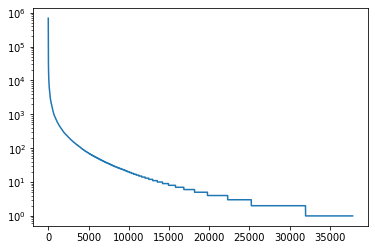

In [9]:
ordered_freq = sorted([(freq, word) for word, freq in word_freq.items()], reverse=True)

print('Total words: {}'.format(len(ordered_freq)))

plt.yscale('log')
plt.plot(np.arange(len(ordered_freq)), [_[0] for _ in ordered_freq])
# plt.xlim(0, 10000)



# 分析测试集输出

In [16]:
from nltk.translate.bleu_score import sentence_bleu
# reference_path = './data/rocstoryline_data/test.txt'
# candidate_path = './data/rocstoryline_data/weight_data/project1_model/test.tsv.out'
# reference_path = './data/new_roc_data/weight_data/project1_model_new_roc_data/test.tsv'
# candidate_path = './data/new_roc_data/weight_data/project1_model_new_roc_data/test.tsv.out'
# reference_path = './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/test.tsv'
# candidate_path = './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/test-generatestoryline.norankloss.out'
reference_path = './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/test.tsv'
candidate_path = './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/test-withtruestoryline.norankloss.out'
with open(candidate_path, 'rt') as f:
        candidate = f.readlines()
with open(reference_path, 'rt') as f:
    reference = f.readlines()
for i, ref in enumerate(reference):
    reference[i] = ref.split('\t')[1].strip().split(' ')
for i, cand in enumerate(candidate):
    candidate[i] = cand.split('\t')[1][:-3].strip().split(' ')
# reference = reference[:-1]

In [17]:
print(reference[-1], candidate[-1])
print(len(reference), len(candidate))

['the', 'orange', 'fell', 'from', 'the', 'tree', '.', '</s>', 'it', 'hit', 'a', 'girl', 'on', 'the', 'head', '.', '</s>', 'the', 'girl', 'looked', 'up', 'at', 'the', 'tree', '.', '</s>', 'another', 'orange', 'fell', 'from', 'the', 'tree', '.', '</s>', 'that', 'orange', 'broke', 'her', 'nose', '</s>'] ['gina', 'fell', 'into', 'the', 'tree', '.', '</s>', 'she', 'hit', 'her', 'head', 'on', 'the', 'ground', '.', '</s>', 'it', 'flew', 'out', '.', '</s>', 'she', 'tried', 'to', 'cry', '.', '</s>', 'she', 'got', 'a', 'bruise', '.', '</s>']
7713 7713


In [10]:
sent_count = []
for i, cand in enumerate(candidate):
    sent_count.append(len(cand.strip().split('</s>')))

AttributeError: 'list' object has no attribute 'strip'

In [38]:
sent_count = np.array(sent_count)
np.all(sent_count == 6)

True

In [18]:
bleu = [0,0,0,0]
bleu_avg = 0
for i in range(len(reference)):
    refs = reference[i]
    cands = candidate[i]
    bleu_avg += sentence_bleu([refs], cands)
    for j in range(4):
        bleu[j] += sentence_bleu([refs], cands, weights=np.eye(4)[j])

/opt/conda/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


[3085.3279426268596, 1339.0432530622343, 458.5849209321227, 153.3650353720322]


In [15]:
print('Bleu 1,2,3,4', np.array(bleu)/len(reference))
print('Bleu avg', bleu_avg/len(reference))

Bleu 1,2,3,4 [0.33200445 0.13175138 0.0291518  0.00657494]
Bleu avg 0.02261160878839482


In [19]:
print('Bleu 1,2,3,4', np.array(bleu)/len(reference))
print('Bleu avg', bleu_avg/len(reference))

Bleu 1,2,3,4 [0.40001659 0.17360862 0.0594561  0.01988397]
Bleu avg 8.248082967892735e-06


In [20]:
bleu_avg

0.06361746393135667

# 预处理测试集数据

In [50]:
path_list = [
    './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/storylines_20.txt',
    './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/storylines_50.txt',
    './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/storylines_80.txt',
]

for path in path_list:
    with open(path, 'rt') as f:
        lines = f.readlines()
    outlines = []
    for line in lines:
        title = line[:line.find('<EOT>')+5].strip()+' </s>'
        storyline = ' '.join(line[line.find('<EOT>')+11:line.find('<EOL>')].strip().split(' </l> '))+' <EOL> </s>'
        outlines.append(title+' '+storyline)
    with open(path+'.processed', 'wt') as f:
        f.writelines('\t None\n'.join(outlines))

# 故事挑选

In [53]:
filepath = './data/new_roc_data_v3/weight_data/p1lm_new_roc_data_v3/test-generatestoryline.norankloss.out'
with open(filepath, 'rt') as f:
    lines = f.readlines()

In [55]:
i = 0

In [56]:
lines[i]

'snow angel <eot> </s> took trip got car drove road started rain whole time <eol> </s>***\tgina drove home from her car . </s> she got out of snow . </s> it started to rain . </s> she ran into the car . </s> she had an hour . </s>***\tthe man went to the car . </s> he was driving on the road . </s> he got a car . </s> he took the car to the car . </s> the car was broken . </s>\n'

In [66]:
line = lines[i]
title_storyline = line.split('\t')[0]
mix_story = [_.strip() for _ in line.split('\t')[1].split('</s>')[:5]]
lm_story = [_.strip() for _ in line.split('\t')[2].split('</s>')[:5]]
print(title_storyline)
print('{:-^80}'.format('Mixture Model'))
for _ in mix_story:
    print(_)
print('{:-^80}'.format('LM'))
for _ in lm_story:
    print(_)
i = np.random.randint(len(lines))

baby brother <eot> </s> new baby named twins have children gave birth happy family <eol> </s>***
---------------------------------Mixture Model----------------------------------
mary 's baby was born with twins .
she wanted to babysit her baby .
when she got home , she found a baby .
the baby gave birth .
sarah had to adopt a baby .
---------------------------------------LM---------------------------------------
anna was having a baby .
she was pregnant .
she had a baby baby .
she had a baby .
she had a baby baby .
